In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt



In [2]:
(imdb_train_original, imdb_validate_original, imdb_test_original), info = \
tfds.load(name='imdb_reviews/subwords8k',split=['train[:80%]', 'train[80%:]', 'test'], with_info=True, as_supervised=True)


In [3]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [4]:
reviews = np.array(
list(imdb_train_original.map(lambda review, label: review)))

print('Tatal', reviews.shape)
for index, review in enumerate(reviews[:16]):
    print(f'Index: {index} length: {review.shape[0]}')


Tatal (20000,)
Index: 0 length: 163
Index: 1 length: 142
Index: 2 length: 200
Index: 3 length: 117
Index: 4 length: 106
Index: 5 length: 421
Index: 6 length: 974
Index: 7 length: 188
Index: 8 length: 313
Index: 9 length: 179
Index: 10 length: 280
Index: 11 length: 394
Index: 12 length: 805
Index: 13 length: 241
Index: 14 length: 517
Index: 15 length: 125


In [5]:
lengths = [len(x) for x in reviews]
print('min', np.min(lengths))
print('max', np.max(lengths))
print('mean', np.mean(lengths))
print('median', np.std(lengths))

min 11
max 3944
mean 343.74655
median 264.46639732317124


(array([2.305e+03, 8.701e+03, 3.706e+03, 2.001e+03, 1.170e+03, 7.360e+02,
        4.770e+02, 3.010e+02, 2.170e+02, 1.490e+02, 1.110e+02, 7.900e+01,
        2.400e+01, 9.000e+00, 4.000e+00, 5.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  11. ,  142.1,  273.2,  404.3,  535.4,  666.5,  797.6,  928.7,
        1059.8, 1190.9, 1322. , 1453.1, 1584.2, 1715.3, 1846.4, 1977.5,
        2108.6, 2239.7, 2370.8, 2501.9, 2633. , 2764.1, 2895.2, 3026.3,
        3157.4, 3288.5, 3419.6, 3550.7, 3681.8, 3812.9, 3944. ]),
 <a list of 30 Patch objects>)

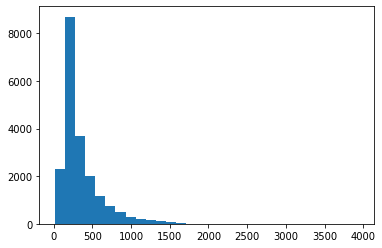

In [6]:
plt.hist(lengths, bins=30)

In [7]:
reviews[0].numpy()

array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
       5790,  995, 7968,    8,   52, 2948, 5240, 80

In [8]:
encoder = info.features['text'].encoder
print(f'Vocabulary size {encoder.vocab_size}')

Vocabulary size 8185


In [9]:
" ".join(encoder.subwords)

'the_ ,  .  a_ and_ of_ to_ s_ is_ br in_ I_ that_ this_ it_  /><  /> was_ The_ as_ t_ with_ for_ .< on_ but_ movie_  ( are_ his_ have_ film_ not_ ing_ be_ ed_ you_  " it d_ an_ he_ by_ at_ one_ who_ y_ from_ e_ or_ all_ like_ they_ "  so_ just_ has_ )  her_ about_ out_ This_ some_ ly_ movie film very_ more_ It_ would_ what_ when_ which_ good_ if_ up_ only_ even_ their_ had_ really_ my_ can_ no_ were_ see_ she_ ?  than_ !  there_ get_ been_ into_  -  will_ much_ story_ because_ ing time_ n_ we_ ed me_ :  most_ other_ don do_ m_ es_ how_ also_ make_ its_ could_ first_ any_ \'  people_ great_ ve_ ly er_ made_ r_ But_ think_  \' i_ bad_ A_ And_ It on ;  him_ being_ never_ way_ that many_ then_ where_ two_ In_ after_ too_ little_ you ),  well_ ng_ your_ If_ l_ ).  does_ ever_ them_ did_ watch_ know_ seen_ time er character_ over_ characters_ movies_ man_ There_ love_ best_ still_ off_ such_ in should_ the re_ He_ plot_ films_ go_ these_ acting_ doesn es show_ through_ better_ al_ something

In [10]:
text = 'Hello my dear friends'
print('original:', text)

text_encoded = encoder.encode(text)
print('Encoded:', text_encoded)
for i in text_encoded:
    print(encoder.subwords[i -1])

text_decoded = encoder.decode(text_encoded)
print('Decoded:', text_decoded)

original: Hello my dear friends
Encoded: [4025, 222, 82, 4946, 127, 1773]
Hell
o_
my_
dea
r_
friends
Decoded: Hello my dear friends


In [11]:
random_review, random_label = list(imdb_train_original.shuffle(1000).take(666))[0]
print(random_review.numpy())
print(random_label.numpy())
print(encoder.decode(random_review))

[ 481  105  202   13  131  174 5524 2317 1541    2  218 4590 1414 7961
  169  105  131   18 1919   34 1011 1528    7   30  443 7989   10   16
   10   17   72   42 2592    8   30 2644    2  131 7667  483   26  129
    6 1390  786 7203 1473 7961 5192   34   44    4  543 5881 7961 1846
    2  144  131 2219  364  197   20 5524 2317 2798 5067 7961  105  179
 7989   10   16   10   17 4438 1414 7961  169  499 7961    9    4  122
   66    2    4   32   13  327  177 1347   44  118   22   37 1866 5513
   11  242  496 7989   10   16   10   17 4670  805 1077  351  278  159
    4  122  497    5    9   84 5235  307   22   63  485  122  744    5
    9 2740    6   41 1672   11  119   27   42 2447 7989   10   16   10
   17 2910  111 1981 1577  127   18 1006   11   55  143 1766   33   77
   18   14   30  107 5398 8028 7976  175 2399   32    6   30 1956    3
   26  131   83 5017 7961 2700   61 4643   44  143 1022    6   14   66
 7989   10   16   10   17   19 1107  280   18  122  114   22  857  890
 2267 

In [12]:
dimensions = encoder.vocab_size

def encode(indices, label):
    indices = tf.dtypes.cast(indices, tf.int32)
    review_encoded = tf.one_hot(indices=indices, depth=dimensions)
    review_encoded = tf.reduce_max(review_encoded, 0)
    
    label_encoded = label
    return review_encoded, label_encoded

    

In [13]:
imdb_train = imdb_train_original.map(lambda review, label: encode(review, label)).cache()
imdb_validate = imdb_validate_original.map(lambda review, label: encode(review, label)).cache()
imdb_test = imdb_test_original.map(lambda review, label: encode(review, label)).cache()

In [14]:
random_review, random_label = list(imdb_train.shuffle(1000).take(1))[0]
print(random_review.shape)
print(random_review.numpy())
print(np.sum(random_review))
print(random_label)

(8185,)
[0. 1. 1. ... 0. 0. 0.]
145.0
tf.Tensor(1, shape=(), dtype=int64)


In [15]:
from tensorflow.keras import models, layers

In [16]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(dimensions,), kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                130976    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________


In [17]:
review_indices, _ = list(imdb_train_original.take(1).as_numpy_iterator())[0]
review_decoded = encoder.decode(review_indices)
print(review_decoded)

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


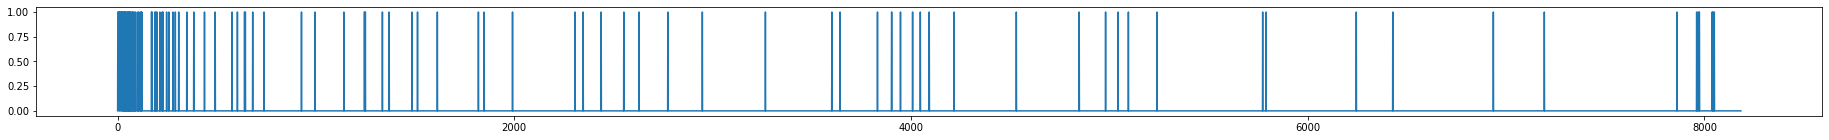

Expectation 0
prediction [0.51769465]


In [18]:
review_onehot, label = list(imdb_train.take(1).as_numpy_iterator())[0]
plt.figure(figsize=(32, 2))
plt.plot(review_onehot)
plt.show()
plt.close()
print('Expectation', label)

prediction = model.predict(np.array([review_onehot]))[0]
print('prediction', prediction)

In [19]:
loss, accuracy = model.evaluate(imdb_test.batch(512))
loss, accuracy

49/49 [==============================] - 46s 929ms/step - loss: 1.1908 - accuracy: 0.4951


(1.1908094882965088, 0.49511998891830444)

In [20]:
history = model.fit(imdb_train.shuffle(10000).batch(512), epochs=20, validation_data=imdb_validate.batch(32))

Epoch 1/20
40/40 [==============================] - 32s 794ms/step - loss: 0.8254 - accuracy: 0.7716 - val_loss: 0.6240 - val_accuracy: 0.8724
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5699 - accuracy: 0.8891 - val_loss: 0.5594 - val_accuracy: 0.8758
Epoch 3/20
40/40 [==============================] - 1s 20ms/step - loss: 0.5113 - accuracy: 0.8989 - val_loss: 0.5288 - val_accuracy: 0.8800
Epoch 4/20
40/40 [==============================] - 1s 23ms/step - loss: 0.4817 - accuracy: 0.9062 - val_loss: 0.5107 - val_accuracy: 0.8792
Epoch 5/20
40/40 [==============================] - 1s 21ms/step - loss: 0.4613 - accuracy: 0.9096 - val_loss: 0.5026 - val_accuracy: 0.8822
Epoch 6/20
40/40 [==============================] - 1s 19ms/step - loss: 0.4464 - accuracy: 0.9119 - val_loss: 0.4920 - val_accuracy: 0.8778
Epoch 7/20
40/40 [==============================] - 1s 16ms/step - loss: 0.4339 - accuracy: 0.9148 - val_loss: 0.5027 - val_accuracy: 0.8718
Epoch 8/20


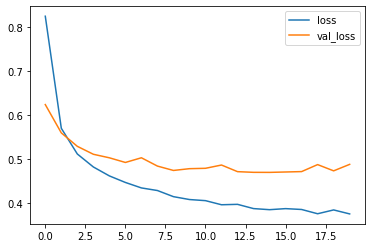

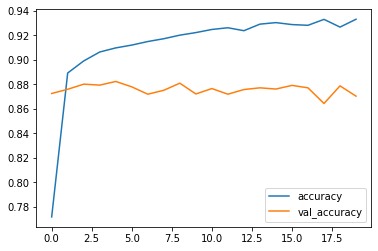

In [21]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()

In [22]:
loss, accuracy  = model.evaluate(imdb_test.batch(32))
loss, accuracy

782/782 [==============================] - 1s 2ms/step - loss: 0.5072 - accuracy: 0.8598


(0.5072396397590637, 0.8597999811172485)

In [29]:
imdb_validate_original

Type:        History
String form: <tensorflow.python.keras.callbacks.History object at 0x7f98334f0b10>
File:        /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/callbacks.py
Docstring:  
Callback that records events into a `History` object.

This callback is automatically applied to
every Keras model. The `History` object
gets returned by the `fit` method of models.


In [97]:
def go_through(dataset):
    for i in dataset:
        yield i[0].numpy()
        yield i[1]

In [ ]:
imdb_test.

In [89]:
loss, accuracy = model.evaluate(imdb_test.batch(2))

12500/12500 [==============================] - 9s 723us/step - loss: 0.5072 - accuracy: 0.8598


In [99]:
next(go_through(imdb_test))

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [158]:
for x, y in imdb_test.as_numpy_iterator():
    print(type(y), type(x))
    print(y)
    print(x)
    print(type(np.array([y])) , type(np.array([x])))
    loss, _ = model.evaluate(x=np.array([x]), y=np.array([y]))
    print(loss)
    break

<class 'numpy.int64'> <class 'numpy.ndarray'>
1
[0. 1. 1. ... 0. 0. 0.]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
1/1 [==============================] - 0s 3ms/step - loss: 0.7631 - accuracy: 1.0000
0.7631382346153259


In [129]:
list(imdb_test_original.take(1))[0][1]

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [168]:
labels = []
reviews = []
losses = []
for review, label in imdb_test_original:
    encoded_review, encoded_label = encode(review, label)
    
    x = np.array([encoded_review.numpy()])
    y = np.array([encoded_label.numpy()])
    
    loss, _= model.evaluate(x=x, y=y)
    
    losses.append(loss)
    labels.append(label)
    reviews.append(review)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1]
[[0. 1. 1. ... 0. 0. 0.]]
1/1 [==============================] - 0s 1ms/step - loss: 0.7631 - accuracy: 1.0000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1]
[[0. 1. 1. ... 0. 0. 0.]]
1/1 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 1.0000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1]
[[0. 1. 1. ... 0. 0. 0.]]
1/1 [==============================] - 0s 759us/step - loss: 0.3366 - accuracy: 1.0000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1]
[[0. 1. 1. ... 0. 0. 0.]]
1/1 [==============================] - 0s 981us/step - loss: 0.2463 - accuracy: 1.0000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1]
[[0. 1. 1. ... 0. 0. 0.]]
1/1 [==============================] - 0s 814us/step - loss: 0.3198 - accuracy: 1.0000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1]
[[0. 1. 1. ... 0. 0. 0.]]
1/1 [==============================] - 0s 878us/step - loss: 0.3766 - accuracy: 1.0000
<class 'numpy.

In [170]:
data = {'label': labels, 'reviews': reviews, 'loss_rate': losses}

In [171]:
import pandas as pd

In [173]:
df = pd.DataFrame(data)

In [174]:
df.head()

,label,reviews,loss_rate
0,"tf.Tensor(1, shape=(), dtype=int64)","(tf.Tensor(173, shape=(), dtype=int64), tf.Ten...",0.763138
1,"tf.Tensor(1, shape=(), dtype=int64)","(tf.Tensor(133, shape=(), dtype=int64), tf.Ten...",0.343344
2,"tf.Tensor(0, shape=(), dtype=int64)","(tf.Tensor(3567, shape=(), dtype=int64), tf.Te...",0.336621
3,"tf.Tensor(0, shape=(), dtype=int64)","(tf.Tensor(7128, shape=(), dtype=int64), tf.Te...",0.246293
4,"tf.Tensor(1, shape=(), dtype=int64)","(tf.Tensor(249, shape=(), dtype=int64), tf.Ten...",0.319768


In [194]:
df['sentiment'] = df.label.apply(lambda row: 'postive' if row.numpy()==1 else 'negative') 

In [216]:
#df['reviews'] = df['reviews'].apply(lambda row: encoder.decode(row))

In [201]:
df.drop(columns=['label'], inplace=True)

In [197]:
df.sentiment.value_counts()

negative    12500
postive     12500
Name: sentiment, dtype: int64

In [205]:
df = df.sort_values(by='loss_rate', ascending=False).reset_index(drop=True)

In [207]:
df.head(10)

,reviews,loss_rate,sentiment
0,"(tf.Tensor(62, shape=(), dtype=int64), tf.Tens...",8.879885,postive
1,"(tf.Tensor(156, shape=(), dtype=int64), tf.Ten...",8.138456,postive
2,"(tf.Tensor(7963, shape=(), dtype=int64), tf.Te...",7.536613,postive
3,"(tf.Tensor(12, shape=(), dtype=int64), tf.Tens...",6.946736,postive
4,"(tf.Tensor(6551, shape=(), dtype=int64), tf.Te...",6.507957,negative
5,"(tf.Tensor(865, shape=(), dtype=int64), tf.Ten...",6.396304,postive
6,"(tf.Tensor(4441, shape=(), dtype=int64), tf.Te...",6.396118,negative
7,"(tf.Tensor(131, shape=(), dtype=int64), tf.Ten...",6.373552,postive
8,"(tf.Tensor(12, shape=(), dtype=int64), tf.Tens...",6.292319,postive
9,"(tf.Tensor(2759, shape=(), dtype=int64), tf.Te...",6.119174,postive


In [208]:
df.tail(10)

,reviews,loss_rate,sentiment
24990,"(tf.Tensor(69, shape=(), dtype=int64), tf.Tens...",0.169530,negative
24991,"(tf.Tensor(1585, shape=(), dtype=int64), tf.Te...",0.169518,negative
24992,"(tf.Tensor(201, shape=(), dtype=int64), tf.Ten...",0.169515,negative
24993,"(tf.Tensor(753, shape=(), dtype=int64), tf.Ten...",0.169515,negative
24994,"(tf.Tensor(3261, shape=(), dtype=int64), tf.Te...",0.169514,negative
24995,"(tf.Tensor(2990, shape=(), dtype=int64), tf.Te...",0.169511,negative
24996,"(tf.Tensor(7784, shape=(), dtype=int64), tf.Te...",0.169511,postive
24997,"(tf.Tensor(133, shape=(), dtype=int64), tf.Ten...",0.169506,postive
24998,"(tf.Tensor(133, shape=(), dtype=int64), tf.Ten...",0.169500,negative
24999,"(tf.Tensor(4650, shape=(), dtype=int64), tf.Te...",0.169499,negative


(array([1.5103e+04, 3.4430e+03, 1.8170e+03, 1.1490e+03, 7.9200e+02,
        5.5700e+02, 4.0400e+02, 3.2800e+02, 2.4800e+02, 2.0200e+02,
        1.5100e+02, 1.3300e+02, 1.2800e+02, 8.4000e+01, 8.2000e+01,
        5.3000e+01, 5.4000e+01, 4.5000e+01, 2.9000e+01, 3.4000e+01,
        2.2000e+01, 2.9000e+01, 1.0000e+01, 1.1000e+01, 1.6000e+01,
        1.0000e+01, 1.1000e+01, 1.2000e+01, 1.0000e+01, 7.0000e+00,
        5.0000e+00, 2.0000e+00, 6.0000e+00, 3.0000e+00, 1.0000e+00,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.1694991 , 0.34370681, 0.51791452, 0.69212224, 0.86632995,
        1.04053766, 1.21474537, 1.38895309, 1.5631608 , 1.73736851,
        1.91157622, 2.08578394, 2.25999165, 2.43419936, 2.60840707,
        2.78261479, 2.9568225 , 3.13103021, 3.30523792, 3.47944564,
        3.65365335, 3.82786106, 4.00206877, 4.

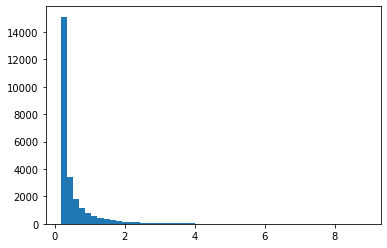

In [212]:
plt.hist(df.loss_rate, bins=50)

(array([1.1457e+04, 4.4400e+03, 3.1140e+03, 2.2830e+03, 1.5910e+03,
        1.0670e+03, 6.3800e+02, 2.9700e+02, 1.0200e+02, 1.1000e+01]),
 array([-2.56065049, -1.98953134, -1.4184122 , -0.84729306, -0.27617391,
         0.29494523,  0.86606437,  1.43718352,  2.00830266,  2.5794218 ,
         3.15054095]),
 <a list of 10 Patch objects>)

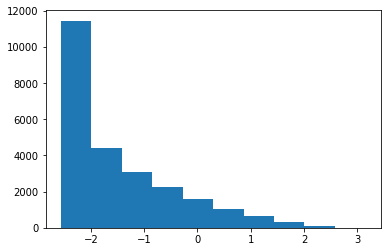

In [217]:
plt.hist(np.log2(df.loss_rate.values))